In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

## Data

In [2]:
np.random.seed(6)
torch.manual_seed(0)
x0 = np.random.randn(100,2) * 0.2 + np.array([2,2])
x1 = np.random.randn(100,2) * 0.2 + np.array([3,1])
x2 = np.random.rand(5,2)*1.5 + np.array([2,1])

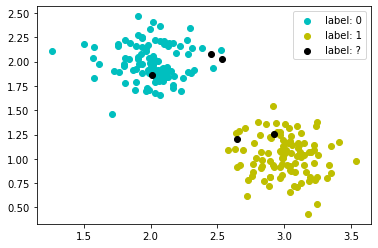

In [3]:
plt.scatter(x0[:,0], x0[:,1], c='c', label='label: 0')
plt.scatter(x1[:,0], x1[:,1], c='y', label='label: 1')
plt.scatter(x2[:,0], x2[:,1], c='k', label='label: ?')
plt.legend()

In [4]:
X = np.concatenate([x0, x1])
y = np.array([0]*100 + [1]*100)

## Sigmoid function

$$
\text{sigmoid}(x) = \frac{1}{1+e^{-x}}
$$

In [5]:
def sigmoid(x):
    return 1/(1+torch.exp(-x))

## Logistic Regression

$$
H(X) = \text{sigmoid}(\,\mathbf{XW} +\mathbf{b})
$$

## Binary Cross Entropy

$$ cost(W) = -\frac{1}{m} \sum y \log\left(H(x)\right) + (1-y) \left( \log(1-H(x) \right) $$

In [6]:
def binary_cross_entropy(y_pred, y):
    return -torch.mean(y * torch.log(y_pred) + (1-y) * torch.log(1-y_pred))

## Implimentation

In [7]:
def LogisticRegression(X):
    return sigmoid(X @ W + b)

In [8]:
X_train = torch.Tensor(X)
y_train = torch.Tensor(y).unsqueeze(1)
X_test = torch.Tensor(x2)

W = torch.zeros(2, 1, requires_grad=True)
b = torch.zeros(1, requires_grad=True)

n_epochs = 100
lr = 0.01

for epoch in range(n_epochs):
    
    y_pred = LogisticRegression(X_train)
    loss = binary_cross_entropy(y_pred, y_train)
    loss.backward()
    
    with torch.no_grad():
        
        # backward propagation
        for param in [W, b]:
            param -= lr * param.grad
            param.grad.data.zero_()
        
        # calculate accuracy
        acc = torch.sum((y_pred >= 0.5) == y_train).item() / len(X_train) 

    if (epoch+1)%10 == 0:
        print(f'epoch:{epoch+1}   loss:{loss.item():.3f}   acc:{acc:.3f}')

epoch:10   loss:0.682   acc:0.750
epoch:20   loss:0.671   acc:0.810
epoch:30   loss:0.660   acc:0.855
epoch:40   loss:0.650   acc:0.920
epoch:50   loss:0.639   acc:0.945
epoch:60   loss:0.629   acc:0.980
epoch:70   loss:0.620   acc:0.990
epoch:80   loss:0.610   acc:0.995
epoch:90   loss:0.601   acc:1.000
epoch:100   loss:0.592   acc:1.000


## Get prediction

In [9]:
with torch.no_grad():
    y_test = (LogisticRegression(X_test) >= 0.5)

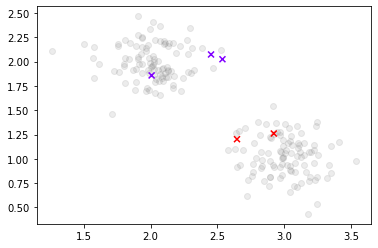

In [10]:
plt.scatter(X_train[:,0], X_train[:,1], c='grey', alpha =0.15)
plt.scatter(X_test[:,0], X_test[:,1], marker='x', c=y_test, cmap='rainbow')
plt.show()

## Using Pytorch libraries

In [11]:
import torch.nn as nn

class LogisticRegression(nn.Module):
    
    def __init__(self):
        super(LogisticRegression, self).__init__()
        self.layer = nn.Linear(2,1)
        self.sigmoid = nn.Sigmoid()
        
    def forward(self, X):
        out = self.sigmoid(self.layer(X))
        return out

In [12]:
from torch.optim import SGD

X_train = torch.Tensor(X)
y_train = torch.Tensor(y).unsqueeze(1)
X_test = torch.Tensor(x2)

model = LogisticRegression()
optimizer = SGD(model.parameters(), lr=0.05)
loss_fn = nn.BCELoss()

n_epochs = 100

for epoch in range(n_epochs):
    y_pred = model(X_train)
    loss = loss_fn(y_pred, y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    with torch.no_grad():
        acc = torch.sum((y_pred >= 0.5) == y_train).item() / len(X_train) 

    if (epoch+1)%10 == 0:
        print(f'epoch:{epoch+1}   loss:{loss.item():.3f}   acc:{acc:.3f}')

epoch:10   loss:0.730   acc:0.255
epoch:20   loss:0.672   acc:0.555
epoch:30   loss:0.621   acc:0.935
epoch:40   loss:0.575   acc:0.990
epoch:50   loss:0.535   acc:1.000
epoch:60   loss:0.499   acc:1.000
epoch:70   loss:0.468   acc:1.000
epoch:80   loss:0.439   acc:1.000
epoch:90   loss:0.414   acc:1.000
epoch:100   loss:0.391   acc:1.000
